In [67]:
#import panda library
import pandas as pd # for importing and handling data
import matplotlib.pyplot as plt # for visulaization
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#load the dataset downloaded from kaggle 
df = pd.read_csv(r'C:\Users\Subheen\Downloads\Datasets\TelcoChurn\Churn_Clean_Telco-Customer-Churn.csv')

#display first 5 rows to check data loaded correctly
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,0042-JVWOJ,M,0,1,0,72,1,1,3,1,...,1,1,1,1,Two year,1,Credit card (automatic),90.25,6369.45,0
1,0057-QBUQH,F,0,1,1,72,1,1,4,1,...,0,1,1,0,Two year,0,Bank transfer (automatic),99.90,7251.70,0
2,0103-CSITQ,F,0,0,0,72,1,1,4,0,...,1,1,1,1,Two year,1,Credit card (automatic),107.50,7853.70,0
3,0106-UGRDO,M,0,1,0,72,0,-1,3,1,...,1,0,0,0,Two year,0,Bank transfer (automatic),42.10,2962.00,0
4,0156-FVPTA,M,0,0,0,72,1,1,4,0,...,1,0,1,1,Two year,1,Bank transfer (automatic),100.90,7459.05,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   int64  
 4   dependents         7043 non-null   int64  
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   int64  
 7   multiple_lines     7043 non-null   int64  
 8   internet_service   7043 non-null   int64  
 9   online_security    7043 non-null   int64  
 10  online_backup      7043 non-null   int64  
 11  device_protection  7043 non-null   int64  
 12  tech_support       7043 non-null   int64  
 13  streaming_tv       7043 non-null   int64  
 14  streaming_movies   7043 non-null   int64  
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

In [8]:
df['churn'].value_counts() # general idea of churn

churn
0    5174
1    1869
Name: count, dtype: int64

In [9]:
df.describe() #basic statistics

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.325004,2.789578,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,0.592219,64.761692,2283.300441,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.642730,1.531556,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.491457,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,118.750000,8684.800000,1.000000


In [14]:
#df['total_charges'].fillna(value=df['total_charges'].mean(), inplace=True)  # Fill numerical NaNs with column mean
df['total_charges'] = df['total_charges'].fillna(value=df['total_charges'].mean()) # above line is deprecated in pandas 3.0

In [ ]:
print(df.total_charges.to_string(index=False)) # just to check the changes are applied or not

In [19]:
df.drop_duplicates(inplace=True) # drop duplicates

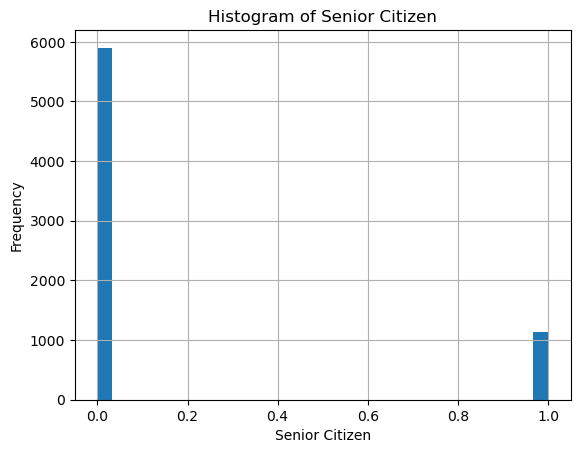

In [22]:
df['senior_citizen'].hist(bins=30)  # trying to chekc distribution of numerial data
plt.xlabel('Senior Citizen')
plt.ylabel('Frequency')
plt.title('Histogram of Senior Citizen')
plt.show()

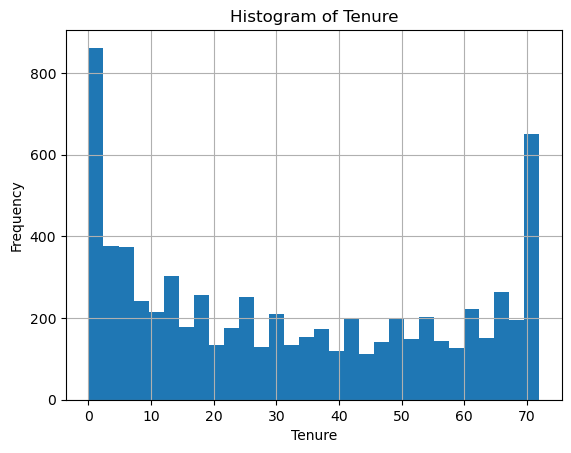

In [23]:
df['tenure'].hist(bins=30)  # trying to chekc distribution of numerial data
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of Tenure')
plt.show()

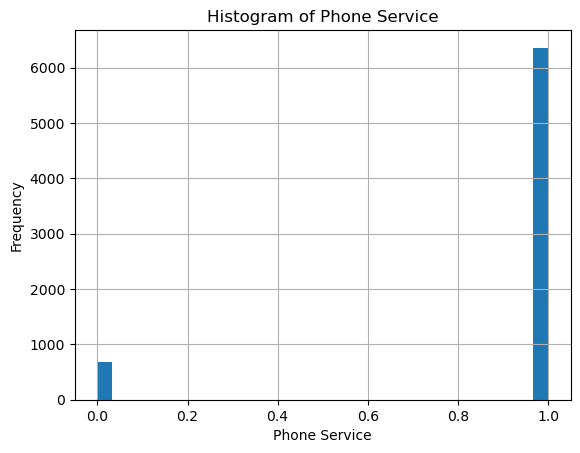

In [24]:
df['phone_service'].hist(bins=30)  # trying to chekc distribution of numerial data
plt.xlabel('Phone Service')
plt.ylabel('Frequency')
plt.title('Histogram of Phone Service')
plt.show()

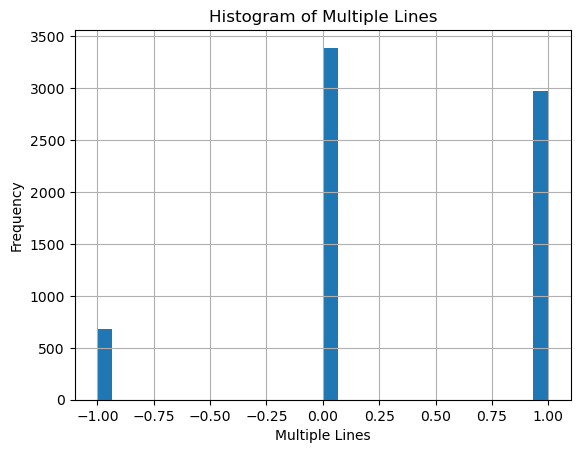

In [25]:
df['multiple_lines'].hist(bins=30)  # trying to chekc distribution of numerial data
plt.xlabel('Multiple Lines')
plt.ylabel('Frequency')
plt.title('Histogram of Multiple Lines')
plt.show()

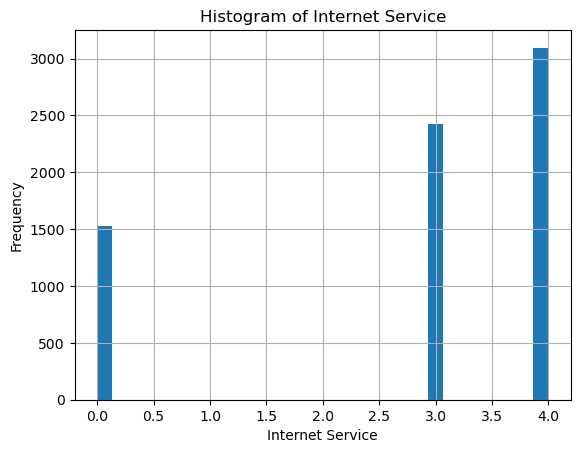

In [26]:
df['internet_service'].hist(bins=30)  # trying to chekc distribution of numerial data
plt.xlabel('Internet Service')
plt.ylabel('Frequency')
plt.title('Histogram of Internet Service')
plt.show()

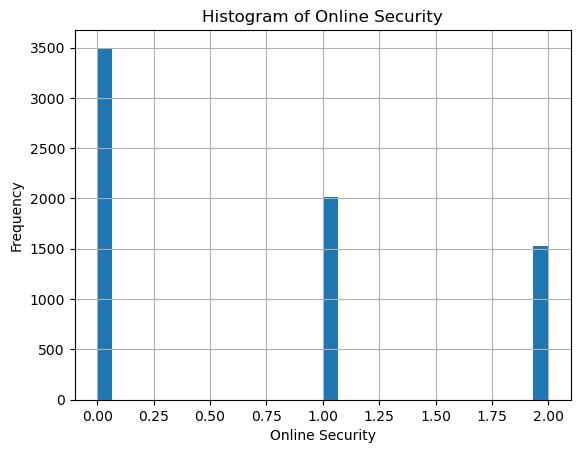

In [27]:
df['online_security'].hist(bins=30)  # trying to chekc distribution of numerial data
plt.xlabel('Online Security')
plt.ylabel('Frequency')
plt.title('Histogram of Online Security')
plt.show()

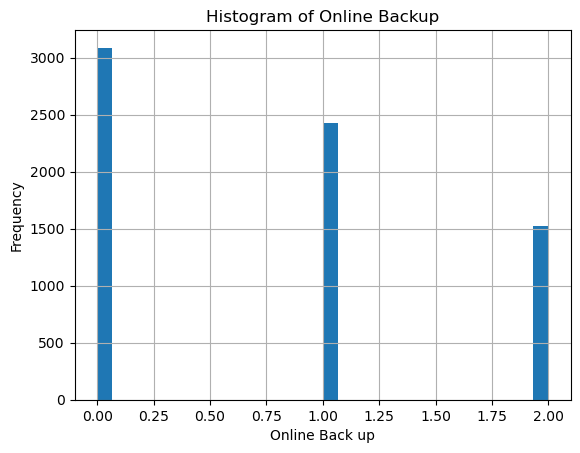

In [28]:
df['online_backup'].hist(bins=30)  # trying to chekc distribution of numerial data
plt.xlabel('Online Back up')
plt.ylabel('Frequency')
plt.title('Histogram of Online Backup')
plt.show()

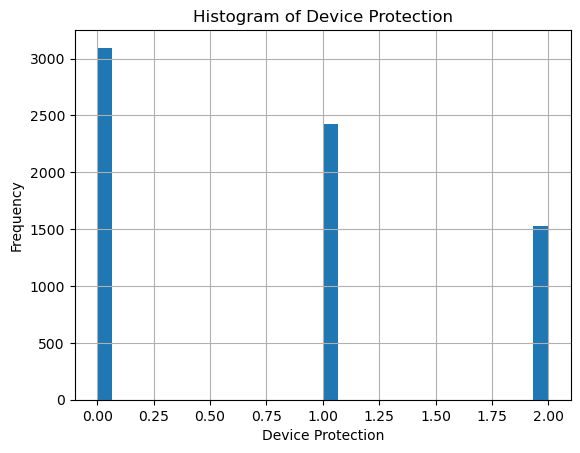

In [3]:
df['device_protection'].hist(bins=30)  # trying to chekc distribution of numerial data
plt.xlabel('Device Protection')
plt.ylabel('Frequency')
plt.title('Histogram of Device Protection')
plt.show()

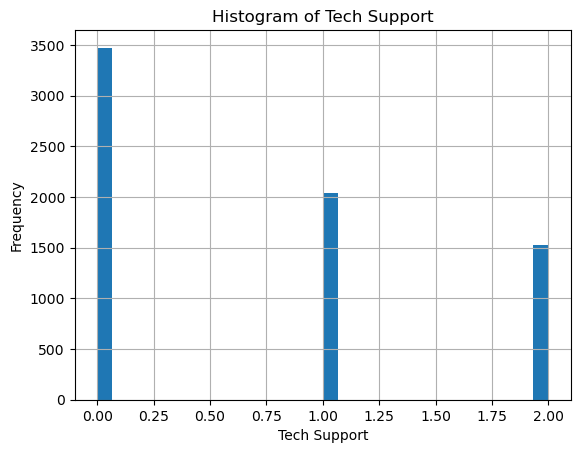

In [4]:
df['tech_support'].hist(bins=30)  # trying to chekc distribution of numerial data
plt.xlabel('Tech Support')
plt.ylabel('Frequency')
plt.title('Histogram of Tech Support')
plt.show()

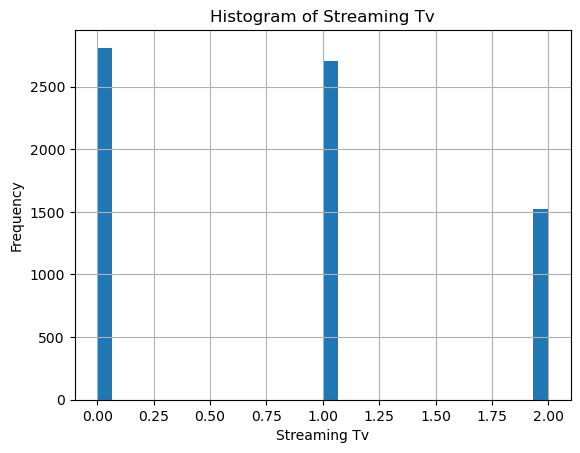

In [5]:
df['streaming_tv'].hist(bins=30)  # trying to chekc distribution of numerial data
plt.xlabel('Streaming Tv')
plt.ylabel('Frequency')
plt.title('Histogram of Streaming Tv')
plt.show()

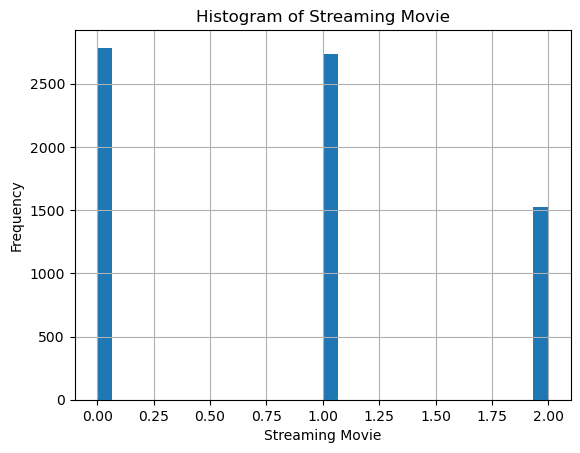

In [7]:
df['streaming_movies'].hist(bins=30)  # trying to chekc distribution of numerial data
plt.xlabel('Streaming Movie')
plt.ylabel('Frequency')
plt.title('Histogram of Streaming Movie')
plt.show()

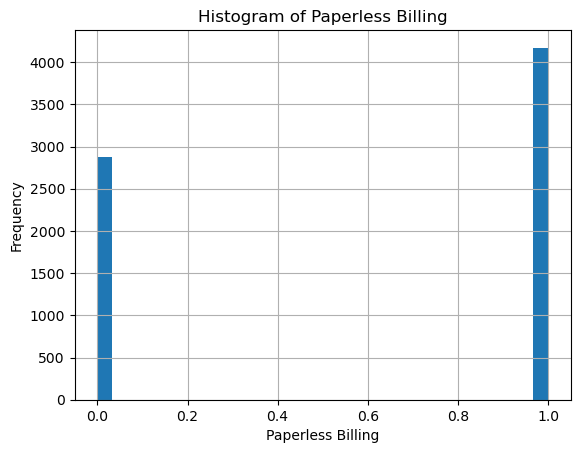

In [8]:
df['paperless_billing'].hist(bins=30)  # trying to chekc distribution of numerial data
plt.xlabel('Paperless Billing')
plt.ylabel('Frequency')
plt.title('Histogram of Paperless Billing')
plt.show()

In [62]:
# Converting categorical colums into numerical for analysis, Machine learng models do ot work on categorical data

df['contract'] = df['contract'].astype('category')
df['contract'] = df['contract'].cat.codes

In [63]:
df['payment_method'] = df['payment_method'].astype('category')
df['payment_method'] = df['payment_method'].cat.codes

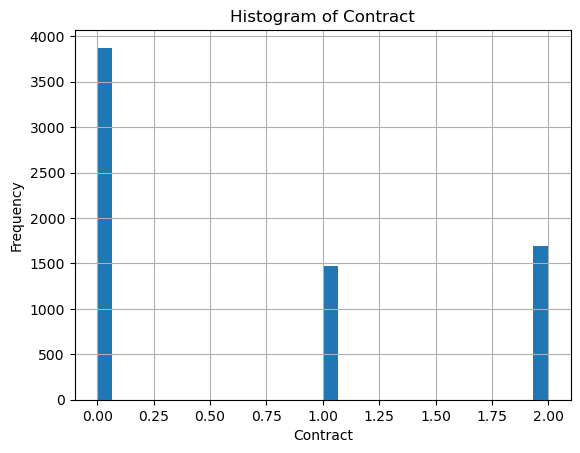

In [17]:
df['contract'].hist(bins=30)  # trying to chekc distribution of numerial data
plt.xlabel('Contract')
plt.ylabel('Frequency')
plt.title('Histogram of Contract')
plt.show()

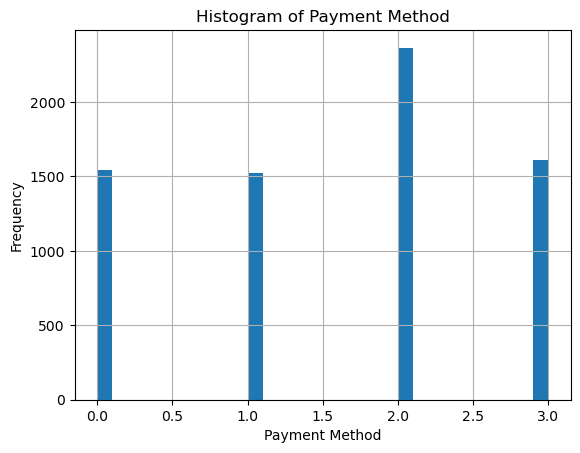

In [19]:
df['payment_method'].hist(bins=30)  # trying to chekc distribution of numerial data
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Histogram of Payment Method')
plt.show()

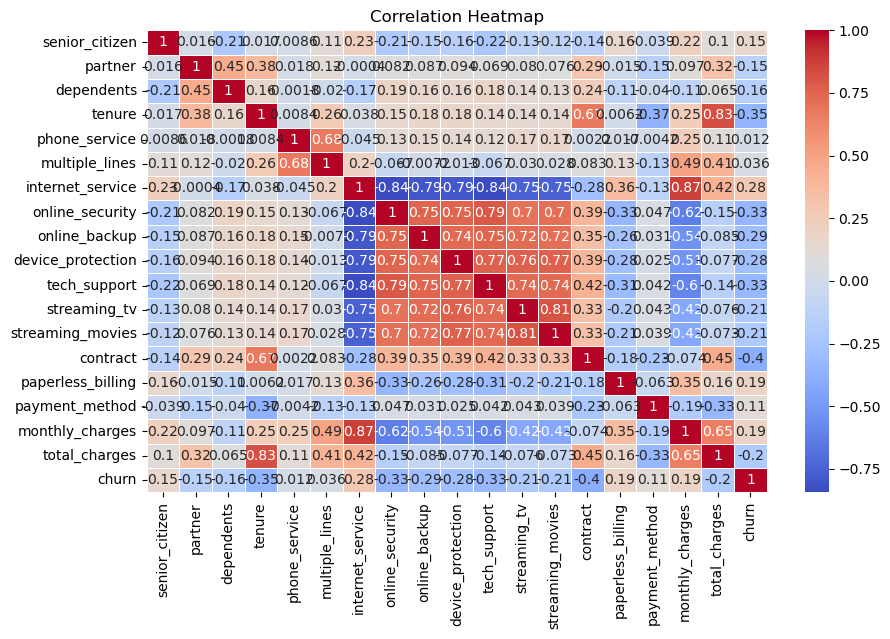

In [22]:
# Histogram (Check Distribution of Numerical Columns)
# Box Plot (Check for Outliers)
#Correlation Heatmap (Find Relationships Between Numeric Variables)

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

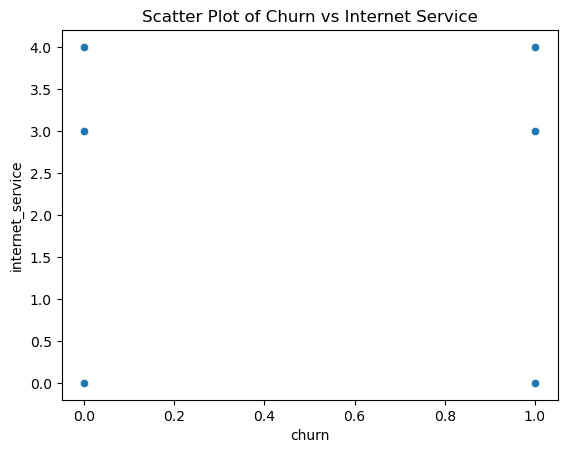

In [23]:
#Scatter Plot (Check Relationship Between Two Numeric Variables)
sns.scatterplot(x=df['churn'], y=df['internet_service'])
plt.title('Scatter Plot of Churn vs Internet Service')
plt.show()


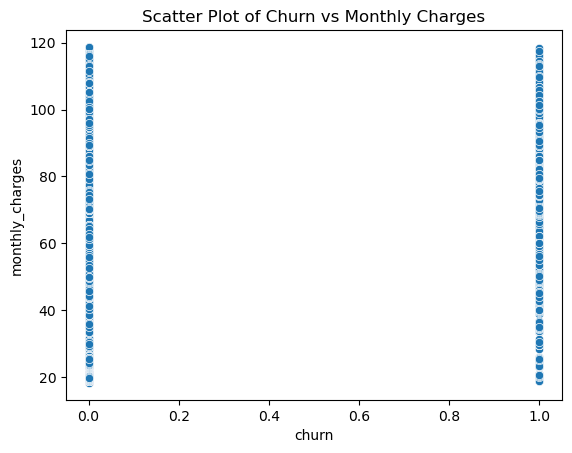

In [24]:
sns.scatterplot(x=df['churn'], y=df['monthly_charges'])
plt.title('Scatter Plot of Churn vs Monthly Charges')
plt.show()


In [31]:
# Above method did not work gives no idea because data is mostly in Binary form I will Try something differnt
# Pearson Correlation (Standard)
# Spearman & Kendall Correlation (For Binary Data)
#df[['churn', 'monthly_charges']].corr()
#df[['churn', 'monthly_charges']].corr(method='spearman')  # For ranked relationships
df[['churn', 'internet_service']].corr(method='kendall')   # For ordinal data

,churn,internet_service
churn,1.000000,0.304319
internet_service,0.304319,1.000000


In [30]:
#Crosstab (Check Relationships in Binary Data)
pd.crosstab(df['churn'], df['monthly_charges'])

monthly_charges,18.25,18.40,18.55,18.70,18.75,18.80,18.85,18.90,18.95,19.00,...,117.35,117.45,117.50,117.60,117.80,118.20,118.35,118.60,118.65,118.75
churn,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,2,1,7,4,2,5,6,...,1,0,1,1,0,1,0,2,1,1
1,0,0,0,0,0,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0


In [32]:
# Crosstab for categorical columns (e.g., SeniorCitizen vs. Churn)
churn_by_group = pd.crosstab(df['senior_citizen'], df['churn'], normalize='index')  
print(churn_by_group)

## 76.4% of non-senior citizens stayed, while 23.6% churned.
#Only 58.3% of senior citizens stayed, while 41.7% churned.
#The churn rate for seniors (41.7%) is almost twice as high as for non-seniors (23.6%).
# Senior citizens are much more likely to churn than non-seniors.

churn                  0         1
senior_citizen                    
0               0.763938  0.236062
1               0.583187  0.416813


In [33]:
df.groupby('churn')['monthly_charges'].mean()

churn
0    61.265124
1    74.441332
Name: monthly_charges, dtype: float64

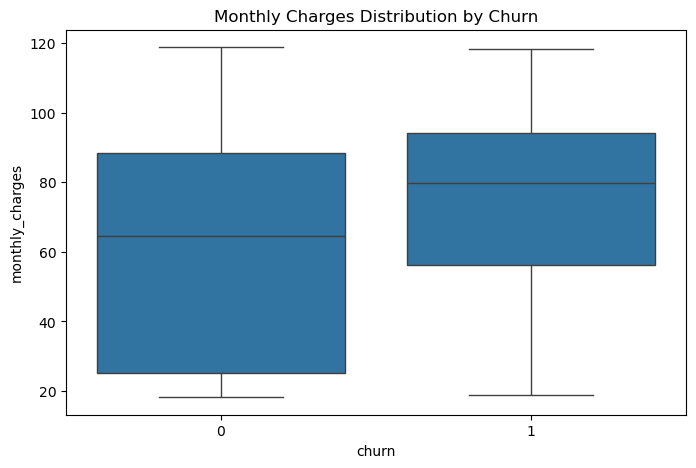

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['churn'], y=df['monthly_charges'])
plt.title('Monthly Charges Distribution by Churn')
plt.show()

In [37]:
# Create a contingency table
table = pd.crosstab(df['senior_citizen'], df['churn'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2 Score: {chi2}, P-value: {p}")

Chi2 Score: 159.42630036838742, P-value: 1.510066805092378e-36


In [39]:
#testing someother groups too
churn_by_group = pd.crosstab(df['partner'], df['churn'], normalize='index')  
print(churn_by_group)
# those with no partners churned more

churn           0         1
partner                    
0        0.670420  0.329580
1        0.803351  0.196649


In [42]:
churn_by_group = pd.crosstab(df['dependents'], df['churn'], normalize='index')  
print(churn_by_group) 
# Those with no dependents cgurned more

churn              0         1
dependents                    
0           0.687209  0.312791
1           0.845498  0.154502


In [44]:
churn_by_group = pd.crosstab(df['contract'], df['churn'], normalize='index')  
print(churn_by_group) # month to month contract type has higher churn rate

churn                  0         1
contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


In [45]:
churn_by_group = pd.crosstab(df['payment_method'], df['churn'], normalize='index')  
print(churn_by_group) # Those paying via ellectric checks churned more

churn                             0         1
payment_method                               
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067


In [46]:
churn_by_group = pd.crosstab(df['paperless_billing'], df['churn'], normalize='index')  
print(churn_by_group)  #Those paying in paperless way are walking out too which proves above analysis 

churn                     0         1
paperless_billing                    
0                  0.836699  0.163301
1                  0.664349  0.335651


In [55]:
# Select independent variables (both numerical & categorical)
features = ['senior_citizen', 'partner','dependents', 'monthly_charges', 'contract', 'payment_method', 'internet_service']

# Convert categorical variables into dummy variables
#df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod'], drop_first=True)

# Define independent variable (X) and dependent variable (y)
X = df[features]  
y = df['churn']

# Add constant for intercept
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.449413
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7035
Method:                           MLE   Df Model:                            7
Date:                Thu, 27 Feb 2025   Pseudo R-squ.:                  0.2233
Time:                        20:06:24   Log-Likelihood:                -3165.2
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.1768      0.134    -16.280      0.000      -2.439      -1.915
senior_citi

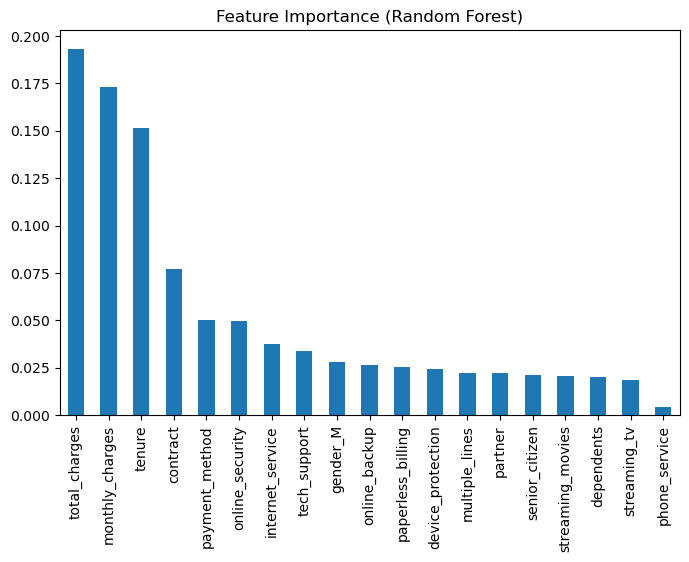

In [65]:

# Drop unique key column (e.g., customerID)
df = df.drop(columns=['customer_id'], errors='ignore')  # Avoids errors if column doesn't exist

# Define target variable
y = df['churn']  # Assuming 'churn' is the column to predict

# Encode categorical variables
X = pd.get_dummies(df.drop(columns=['churn']), drop_first=True)  

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get Feature Importance
importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8,5))
importance.plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.show()


In [68]:
# Predict on test data
y_pred = rf.predict(X_test)

# Model Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1027
           1       0.68      0.48      0.56       382

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

